In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../..")

import pickle
from pathlib import Path
from typing import Literal

import pandas as pd
import seaborn as sns
from plot_config import savefig

from xlstm_scaling_laws.analysis.parametric_sclaw_fit.run_fit_grid import (
    load_combined_fit_grid_df,
)
from xlstm_scaling_laws.analysis.plot_main_figure import get_main_figure_plot

While loading IsoFLOP Runs: Overriding attention flop calc mode to distill_scaling.
KeyError: 'dataset/'. While creating RunData from WandBRunData(name=dclm_mLSTMv1_80M_ctx2048_lr0.003_steps16400_nb10_ed512_nh4_pf2.667_gbs512, id=0m5bmumq, path=['xlstm', 'xlstm_jax', '0m5bmumq'], created_at=2025-04-13T06:17:04Z)
KeyError: 'dataset/'. While creating RunData from WandBRunData(name=dclm_mLSTMv1_200M_ctx2048_lr0.003_steps3000_nb27_ed896_nh7_pf2.667_gbs512, id=ch1anxyv, path=['xlstm', 'xlstm_jax', 'ch1anxyv'], created_at=2025-04-13T17:35:13Z)
KeyError: 'dataset/'. While creating RunData from WandBRunData(name=dclm_mLSTMv1_80M_ctx2048_lr0.003_steps27200_nb10_ed512_nh4_pf2.667_gbs512, id=52pij92y, path=['xlstm', 'xlstm_jax', '52pij92y'], created_at=2025-04-13T08:12:40Z)
KeyError: 'dataset/'. While creating RunData from WandBRunData(name=dclm_mLSTMv1_500M_ctx2048_lr0.002_steps9600_nb27_ed1152_nh9_pf2.667_gbs512, id=oyn1hwkt, path=['xlstm', 'xlstm_jax', 'oyn1hwkt'], created_at=2025-04-14T17:41:

# Headline Figure

In [2]:
data_dir_lnd_fits = "../../data_lnd_fits"

/system/user/publicwork/kschweig/xlstm_scaling_laws/notebooks_plots/scaling_law_training_plots__paper/../../xlstm_scaling_laws/analysis/parametric_sclaw_fit/plot/plot_scaling_law_fit_single.py:84: PerformanceWarning: indexing past lexsort depth may impact performance.
  model_tag_fit_df = combined_fit_grid_df.loc[
/system/user/publicwork/kschweig/xlstm_scaling_laws/notebooks_plots/scaling_law_training_plots__paper/../../xlstm_scaling_laws/analysis/parametric_sclaw_fit/plot/plot_scaling_law_fit_single.py:84: PerformanceWarning: indexing past lexsort depth may impact performance.
  model_tag_fit_df = combined_fit_grid_df.loc[
KeyError: 'dataset/'. While creating RunData from WandBRunData(name=dclm_llama_80M_ctx8192_lr0.003_steps12200_nb14_ed512_hd64_gbs128, id=qnz6n90e, path=['xlstm', 'xlstm_jax', 'qnz6n90e'], created_at=2025-04-10T11:00:28Z)
KeyError: 'dataset/'. While creating RunData from WandBRunData(name=dclm_llama_1.1B_ctx8192_lr0.0008_steps10400_nb27_ed1792_hd128_gbs128, id=ck44j8

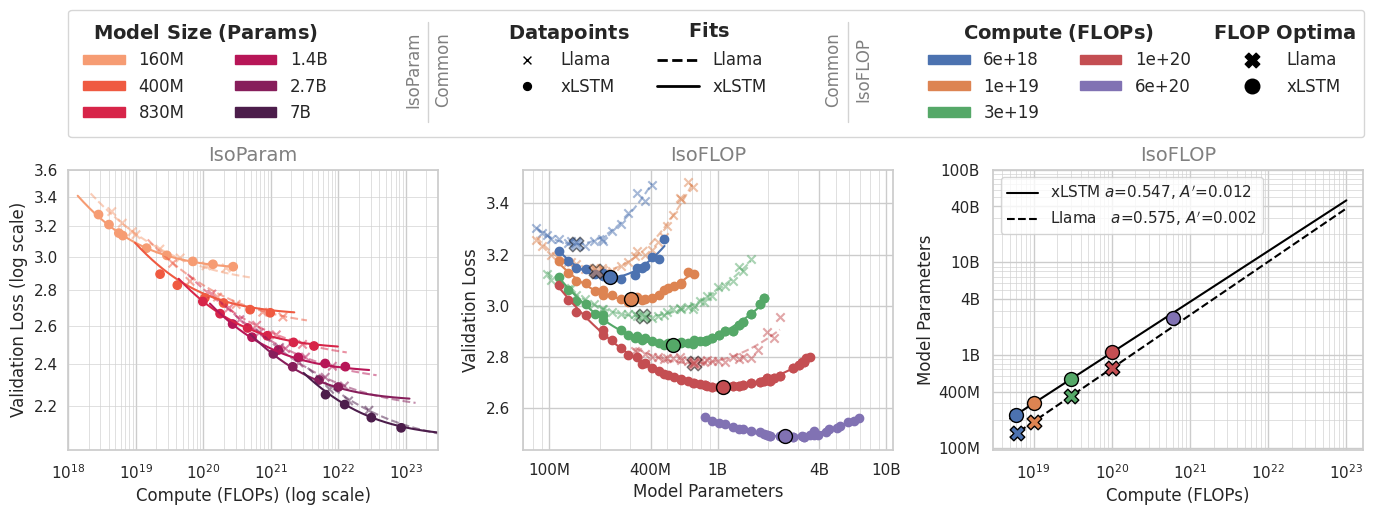

In [ ]:
df = load_combined_fit_grid_df(
    save_dir=data_dir_lnd_fits,
    use_logsumexp=True,
    huber_delta=1e-3,  # 1e-5, #5.0,#1e-5,#5.0,
    fit_gamma=True,  # True, False
    context_length=8192,
)
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        fig = get_main_figure_plot(
            figsize=(10, 4),
            combined_fit_grid_df=df,
            linestyles=["dashed", "solid"],
            experiment_set_fit="tokenparam",
            datapoints_num_param_selection=None,
            x_axis_mode="num_flops",
            model_tags_label_map={
                "llama": "Llama",
                "mlstm": "xLSTM",
            },
            data_points_style_dict={
                "llama": {"marker": "x"},
                "mlstm": {"marker": "o"},
            },
        )

In [4]:
savefig(fig, filename="main_figure")